In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import eli5
from sklearn.preprocessing import LabelEncoder

c:\Users\Administrator\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dataset = pd.read_csv("./StudentsPerformance.csv")

In [3]:
# Check the missing values

dataset.isnull().mean() * 100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [4]:
# Before looking at the correlation between given features, we need to encode all the "non-numerical" features

numerics = ["int16", "int32", "int64", "float32", "float64"]

categorical_features = []

for i in dataset.columns:
 if dataset[i].dtype not in numerics:
  categorical_features.append(i)
 
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [5]:
# Encode the columns that contain "categorical" values

le = LabelEncoder()

for i in categorical_features:
 dataset[i] = le.fit_transform(dataset[i])

dataset.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


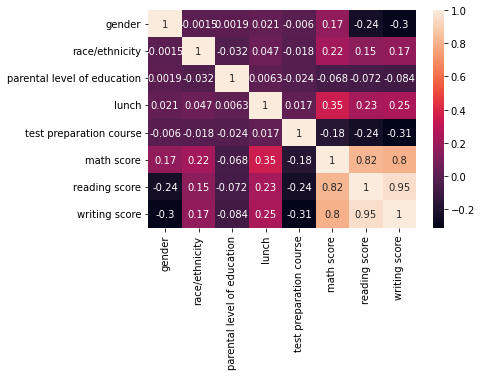

In [6]:
# Now, when we have all the values in our dataset being numericals we can take at the given correlation between these features

matrix = dataset.corr()
sns.heatmap(matrix, annot = True)
plt.show()

In [7]:
# Create a new feature called "Overall score"

dataset["overall_score"] = (
    dataset["math score"] + dataset["writing score"] + dataset['reading score']) / 3
dataset['overall_score'] = dataset['overall_score'].apply(lambda x: round(x))

<AxesSubplot:>

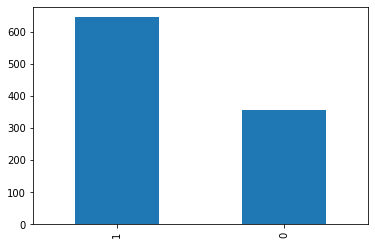

In [8]:
# From the heatmap above we can see correlation between different features we have in our dataset. This correlation shows that the most significant factor that impacts students' performance in the variety of disciplines is - presence of lunch. Let's take a look at the ratio of students who have and don't have lunch

dataset["lunch"].value_counts().plot(kind="bar")

The difference in overall performance is: 8.64


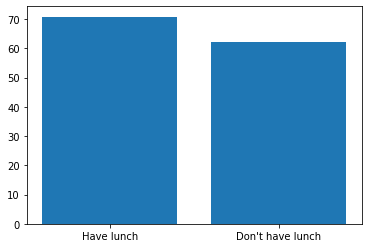

In [35]:
# Take a look at the distinction between those students who have lunch and those who don't

lunch_true = dataset[dataset["lunch"] == 1]
lunch_false = dataset[dataset['lunch'] == 0]

labels = ["Have lunch", "Don't have lunch"]
mean_true = lunch_true['overall_score'].mean()
mean_false = lunch_false['overall_score'].mean()
values = [lunch_true["overall_score"].mean(), lunch_false["overall_score"].mean()]

plt.bar(labels, values)
print(
    f"The difference in overall performance is: {round(max(mean_true, mean_false) - min(mean_true, mean_false), 2)}")


[Text(0.5, 1.0, 'Overall score'), Text(0.5, 0, '')]

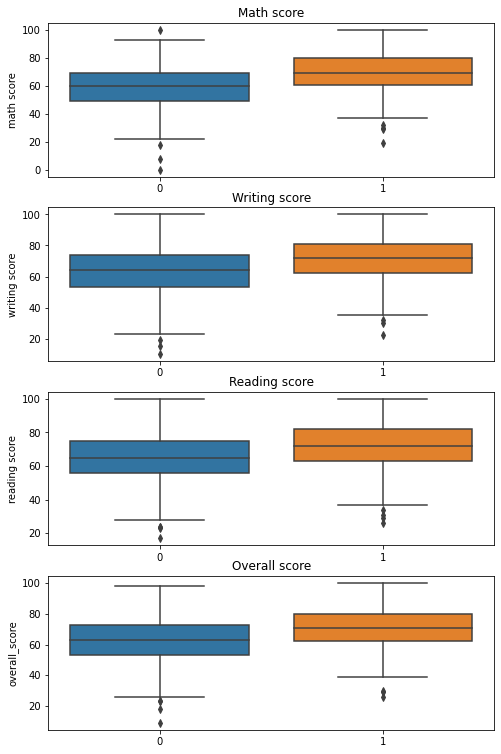

In [10]:
fig, axs = plt.subplots(4, figsize = (8, 13))
sns.boxplot(ax = axs[0], x = 'lunch', y = 'math score', data = dataset).set(title = "Math score", xlabel = None)
sns.boxplot(ax = axs[1], x = 'lunch', y = 'writing score', data = dataset).set(title = "Writing score", xlabel = None)
sns.boxplot(ax = axs[2], x = 'lunch', y = 'reading score', data = dataset).set(title = "Reading score", xlabel = None)
sns.boxplot(ax = axs[3], x = 'lunch', y = 'overall_score', data = dataset).set(title = "Overall score", xlabel = None)

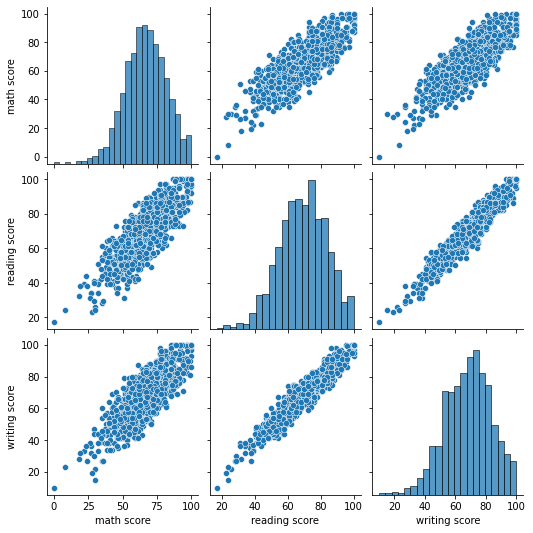

In [11]:
# Insights from the heatmap also revealed strong correlation between the academic disciplines (math, reading, writing)

sns.pairplot(dataset[["math score", "reading score", "writing score"]])

gender                         int32
race/ethnicity                 int32
parental level of education    int32
lunch                          int32
test preparation course        int32
math score                     int64
reading score                  int64
writing score                  int64
overall_score                  int64
dtype: object


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:xlabel='writing score', ylabel='Density'>

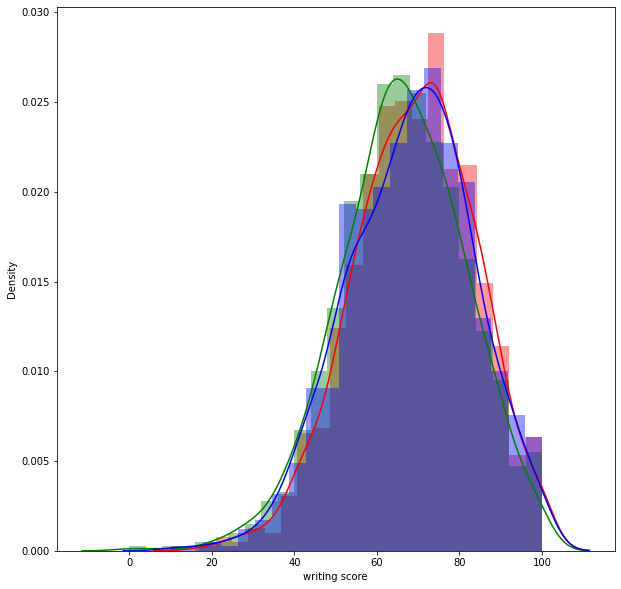

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
print(dataset.dtypes)
sns.distplot(dataset["reading score"], ax = ax, color='red')
sns.distplot(dataset["math score"], ax = ax, color="green")
sns.distplot(dataset["writing score"], ax = ax, color='blue')

<BarContainer object of 5 artists>

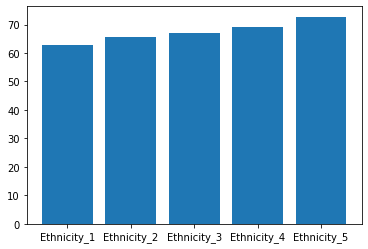

In [43]:
# Second, the most influential factor is Race/Ethnicity

amount_groups = len(dataset["race/ethnicity"].value_counts())

ethnicities = []
ethnicities_mean_performance = []

for i in range(amount_groups):
 ethnicities.append(f"Ethnicity_{i + 1}")
 ethnicities_mean_performance.append(dataset[dataset['race/ethnicity'] == i]["overall_score"].mean())

plt.bar(ethnicities, ethnicities_mean_performance)